# **Data Cleaning**

In [1]:
#imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import spacy

In [2]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:

# Specify the file path
file_path = '/content/DatafinitiElectronicsProductData.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)
data.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


Handling Missing Values

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

colors                 2019
dimension              1209
ean                    4348
manufacturer           2667
reviews.date             61
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.text              5
reviews.title             4
reviews.username          2
dtype: int64



*   colors, dimension, ean, manufacturer:
    - These columns are not critical for our recommendation system. We'll drop these columns if necessary.

*   reviews.doRecommend, reviews.numHelpful, reviews.rating:
    - Impute or drop based on the analysis. For reviews.rating, it is critical, so we may drop rows with missing values.



In [6]:
# Drop columns with a high number of missing values
data_cleaned = data.drop(columns=['colors', 'dimension', 'ean', 'manufacturer'])

# Drop rows with missing review text or title
data_cleaned = data_cleaned.dropna(subset=['reviews.text', 'reviews.title'])

# Impute missing 'reviews.date' with a placeholder
data_cleaned['reviews.date'].fillna('Unknown', inplace=True)

# Drop rows with missing 'reviews.rating'
data_cleaned = data_cleaned.dropna(subset=['reviews.rating'])

# For 'reviews.doRecommend' and 'reviews.numHelpful', we'll impute missing values with the median
data_cleaned['reviews.doRecommend'].fillna(data_cleaned['reviews.doRecommend'].mode()[0], inplace=True)
data_cleaned['reviews.numHelpful'].fillna(data_cleaned['reviews.numHelpful'].median(), inplace=True)

# Display the cleaned data
data_cleaned.head()

,id,asins,brand,categories,dateAdded,dateUpdated,imageURLs,keys,manufacturerNumber,name,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


Data Type Coversion

In [7]:
# Convert 'dateAdded' and 'dateUpdated' to datetime
data_cleaned['dateAdded'] = pd.to_datetime(data_cleaned['dateAdded'], errors='coerce')
data_cleaned['dateUpdated'] = pd.to_datetime(data_cleaned['dateUpdated'], errors='coerce')

# Convert 'reviews.rating' to numeric
data_cleaned['reviews.rating'] = pd.to_numeric(data_cleaned['reviews.rating'], errors='coerce')

# Display the data types to confirm changes
data_cleaned.dtypes

id                                  object
asins                               object
brand                               object
categories                          object
dateAdded              datetime64[ns, UTC]
dateUpdated            datetime64[ns, UTC]
imageURLs                           object
keys                                object
manufacturerNumber                  object
name                                object
primaryCategories                   object
reviews.date                        object
reviews.dateSeen                    object
reviews.doRecommend                   bool
reviews.numHelpful                 float64
reviews.rating                     float64
reviews.sourceURLs                  object
reviews.text                        object
reviews.title                       object
reviews.username                    object
sourceURLs                          object
upc                                float64
weight                              object
dtype: obje

Duplicate Removal

In [8]:
# Check for duplicates
duplicates = data_cleaned.duplicated().sum()

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Display the number of duplicates found and removed
duplicates

0

Standardize Text Data

In [9]:
# Standardize text data: Convert to lowercase and strip extra spaces
data_cleaned['reviews.text'] = data_cleaned['reviews.text'].str.lower().str.strip()
data_cleaned['reviews.title'] = data_cleaned['reviews.title'].str.lower().str.strip()
data_cleaned['brand'] = data_cleaned['brand'].str.lower().str.strip()
data_cleaned['categories'] = data_cleaned['categories'].str.lower().str.strip()

# Display the cleaned text data
data_cleaned[['reviews.text', 'reviews.title', 'brand', 'categories']].head()

,reviews.text,reviews.title,brand,categories
0,"this keyboard is very easy to type on, but the...",love the fingerprint reader,microsoft,"electronics,computers,computer accessories,key..."
1,it's thin and light. i can type pretty easily ...,nice,microsoft,"electronics,computers,computer accessories,key..."
2,i love the new design the keys are spaced well...,new,microsoft,"electronics,computers,computer accessories,key..."
3,attached easily and firmly. has a nice feel. a...,nice keyboard,microsoft,"electronics,computers,computer accessories,key..."
4,"our original keyboard was okay, but did not ha...",nice improvement,microsoft,"electronics,computers,computer accessories,key..."


Outlier Detection and Handling

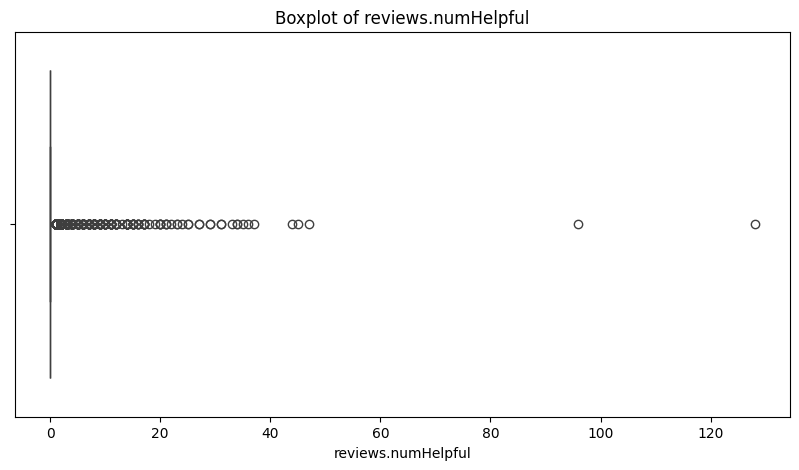

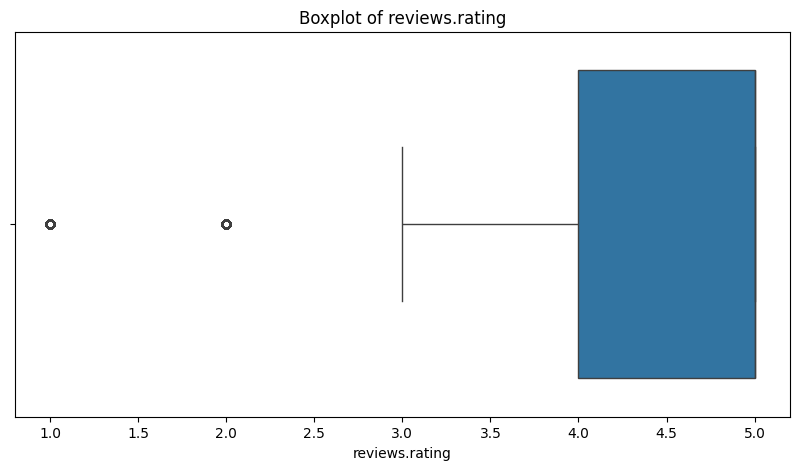

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots for numerical columns
def plot_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Plot boxplots for 'reviews.numHelpful' and 'reviews.rating'
plot_boxplots(data_cleaned, ['reviews.numHelpful', 'reviews.rating'])

From the boxplots, we can observe the presence of outliers in the reviews.numHelpful column. The reviews.rating column appears to be within a normal range, considering it's a typical 5-point rating scale.

Handling Outliers

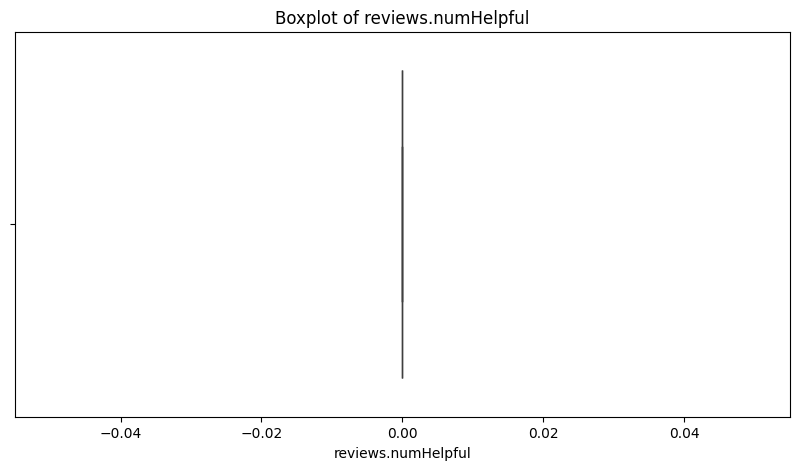

In [11]:
# Function to cap outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Cap outliers in 'reviews.numHelpful'
cap_outliers(data_cleaned, 'reviews.numHelpful')

# Plot the boxplot again to verify
plot_boxplots(data_cleaned, ['reviews.numHelpful'])

In the context of reviews.numHelpful, an outlier might be a review marked as exceptionally helpful or unhelpful by an unusually high number of users compared to others.
These extreme values can skew statistical analyses and may disproportionately influence model training, leading to biased or unstable models.
By capping values outside 1.5 times the IQR above the third quartile (Q3) and below the first quartile (Q1), we effectively limit the influence of extreme outliers.


# **Feature Engineering**

Create New Features:
* Review Length: The length of the review text.

* Average Rating Per Product: The average rating for each product.


In [12]:
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Tokenize and remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the reviews
data_cleaned['processed_reviews'] = data_cleaned['reviews.text'].apply(preprocess_text)

# Display the processed reviews
data_cleaned[['reviews.text', 'processed_reviews']].head()

,reviews.text,processed_reviews
0,"this keyboard is very easy to type on, but the...",keyboard easy type fingerprint reader best fea...
1,it's thin and light. i can type pretty easily ...,thin light type pretty easily
2,i love the new design the keys are spaced well...,love new design key spaced well mi type finger...
3,attached easily and firmly. has a nice feel. a...,attached easily firmly nice feel must surface pro
4,"our original keyboard was okay, but did not ha...",original keyboard okay laptop feel bit floppy ...


Simplified Text Preprocessing


In [13]:
import re

# Predefined list of stop words (a small subset)
simple_stop_words = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
                         "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them",
                         "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am",
                         "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did",
                         "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at",
                         "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after",
                         "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
                         "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
                         "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
                         "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

# Function for simplified text preprocessing
def simple_preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in simple_stop_words]

    return ' '.join(tokens)

# Apply the simplified preprocessing function to the reviews
data_cleaned['processed_reviews'] = data_cleaned['reviews.text'].apply(simple_preprocess_text)

# Display the processed reviews
data_cleaned[['reviews.text', 'processed_reviews']].head()

,reviews.text,processed_reviews
0,"this keyboard is very easy to type on, but the...",keyboard easy type fingerprint reader best fea...
1,it's thin and light. i can type pretty easily ...,thin light type pretty easily
2,i love the new design the keys are spaced well...,love new design keys spaced well mis types fin...
3,attached easily and firmly. has a nice feel. a...,attached easily firmly nice feel must surface pro
4,"our original keyboard was okay, but did not ha...",original keyboard okay laptop feel bit floppy ...


Review Sentiment Analysis

In [14]:
# Define a function to categorize sentiment based on rating
def sentiment_from_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new 'sentiment' column
data_cleaned['sentiment'] = data_cleaned['reviews.rating'].apply(sentiment_from_rating)

# Display the new 'sentiment' column
data_cleaned[['reviews.rating', 'sentiment']].head()

,reviews.rating,sentiment
0,5.0,positive
1,4.0,positive
2,4.0,positive
3,5.0,positive
4,5.0,positive




1. Ratings 4 and 5 are considered positive.
2. Rating 3 is considered neutral.
3. Ratings 1 and 2 are considered negative.


In [15]:
 #Define a function to categorize sentiment based on rating
def sentiment_from_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new 'sentiment' column
data_cleaned['sentiment'] = data_cleaned['reviews.rating'].apply(sentiment_from_rating)

# Display the new 'sentiment' column along with processed reviews
data_cleaned[['processed_reviews', 'sentiment']].head()

,processed_reviews,sentiment
0,keyboard easy type fingerprint reader best fea...,positive
1,thin light type pretty easily,positive
2,love new design keys spaced well mis types fin...,positive
3,attached easily firmly nice feel must surface pro,positive
4,original keyboard okay laptop feel bit floppy ...,positive


 Create a feature for the word count of each review.

In [16]:
# Create a new feature 'word_count'
data_cleaned['word_count'] = data_cleaned['reviews.text'].apply(lambda x: len(x.split()))

# Display the new 'word_count' column
data_cleaned[['reviews.text', 'word_count']].head()

,reviews.text,word_count
0,"this keyboard is very easy to type on, but the...",23
1,it's thin and light. i can type pretty easily ...,11
2,i love the new design the keys are spaced well...,29
3,attached easily and firmly. has a nice feel. a...,14
4,"our original keyboard was okay, but did not ha...",32


 Number of Reviews Per Product

In [27]:
# Create a 'num_reviews' column by counting the number of reviews for each product
data_cleaned['num_reviews'] = data_cleaned.groupby('name')['reviews.text'].transform('count')

In [30]:

# Check for existing 'num_reviews' column and handle it
if 'num_reviews' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['num_reviews'])

# Calculate the number of reviews per product based on the product name
num_reviews_per_product = data_cleaned['name'].value_counts().reset_index()
num_reviews_per_product.columns = ['name', 'num_reviews']

# Merge the number of reviews with the main dataset
data_cleaned = data_cleaned.merge(num_reviews_per_product, on='name', how='left')

# Display the new 'num_reviews' column
print(data_cleaned[['name', 'num_reviews']].head())

                                                name  num_reviews
0  Microsoft Surface Pro 4 Type Cover with Finger...          495
1  Microsoft Surface Pro 4 Type Cover with Finger...          495
2  Microsoft Surface Pro 4 Type Cover with Finger...          495
3  Microsoft Surface Pro 4 Type Cover with Finger...          495
4  Microsoft Surface Pro 4 Type Cover with Finger...          495


In [31]:
# Rename the correct 'num_reviews' column and drop the other one
data_cleaned = data_cleaned.drop(columns=['num_reviews_x'])
data_cleaned = data_cleaned.rename(columns={'num_reviews_y': 'num_reviews'})

# Display the cleaned dataframe with the correct 'num_reviews' column
data_cleaned[['name', 'num_reviews']].head()

,name,num_reviews,num_reviews
0,Microsoft Surface Pro 4 Type Cover with Finger...,495,495
1,Microsoft Surface Pro 4 Type Cover with Finger...,495,495
2,Microsoft Surface Pro 4 Type Cover with Finger...,495,495
3,Microsoft Surface Pro 4 Type Cover with Finger...,495,495
4,Microsoft Surface Pro 4 Type Cover with Finger...,495,495


# **Exploratory Data Analysis**

Distribution of Ratings

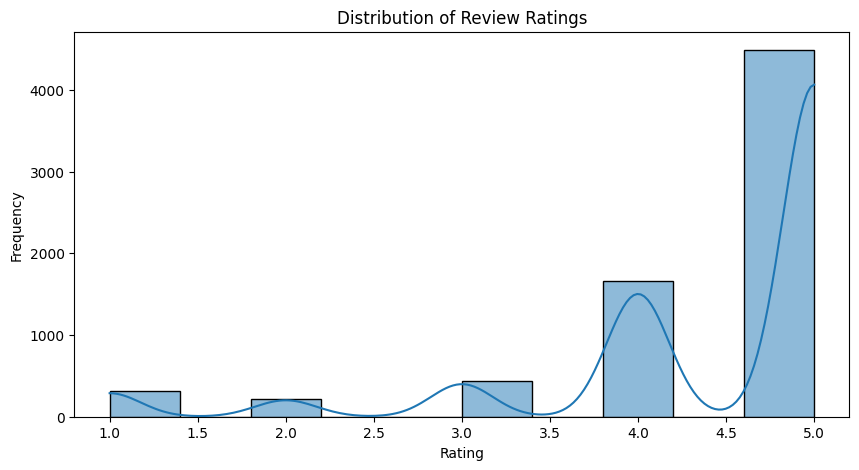

In [32]:
# Plot the distribution of review ratings
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['reviews.rating'], bins=10, kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most reviews have high ratings, with a significant number of 4 and 5-star reviews. This is typical for product reviews on e-commerce platforms.

<ipython-input-33-4e620b56fb0b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reviews.rating', y='brand', data=average_rating_per_brand, palette='viridis')


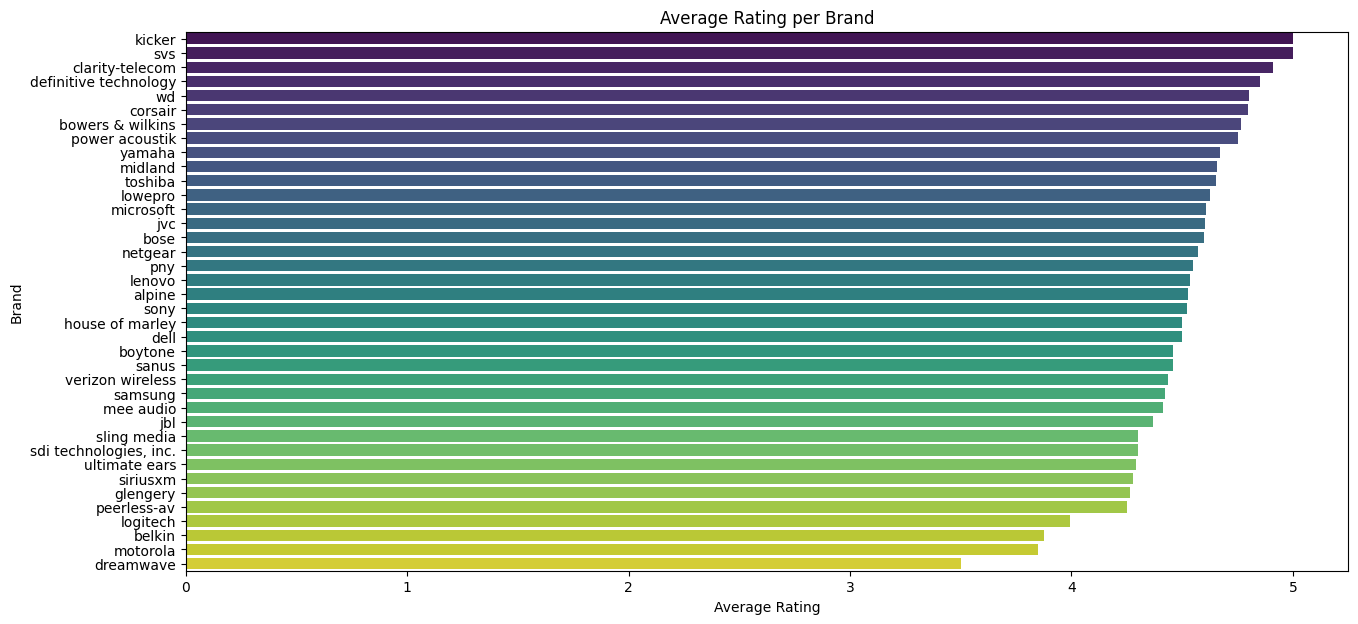

In [33]:
# Calculate the average rating per brand
average_rating_per_brand = data_cleaned.groupby('brand')['reviews.rating'].mean().reset_index()
average_rating_per_brand = average_rating_per_brand.sort_values(by='reviews.rating', ascending=False)

# Plot the average rating per brand
plt.figure(figsize=(15, 7))
sns.barplot(x='reviews.rating', y='brand', data=average_rating_per_brand, palette='viridis')
plt.title('Average Rating per Brand')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.show()

Distribution of Sentiments


<ipython-input-34-01d0baf6cd32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data_cleaned, palette='viridis')


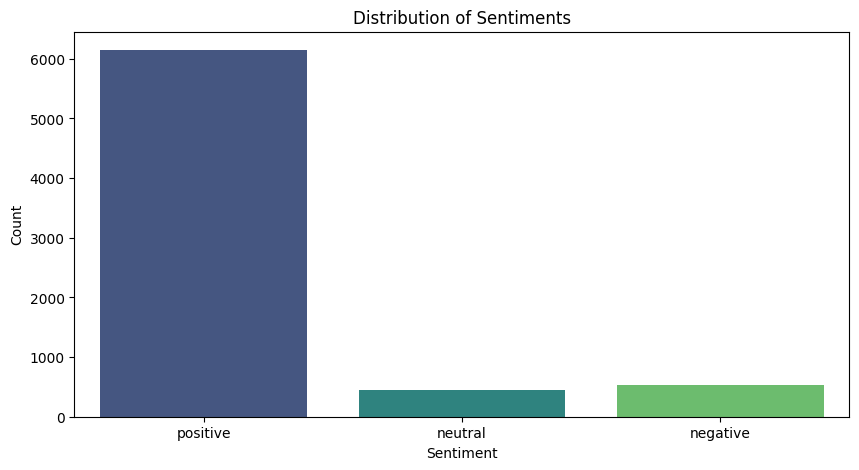

In [34]:
# Plot the distribution of sentiments
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=data_cleaned, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Review Length vs. Sentiment


<ipython-input-36-db048dcd413f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data_cleaned, palette='viridis')


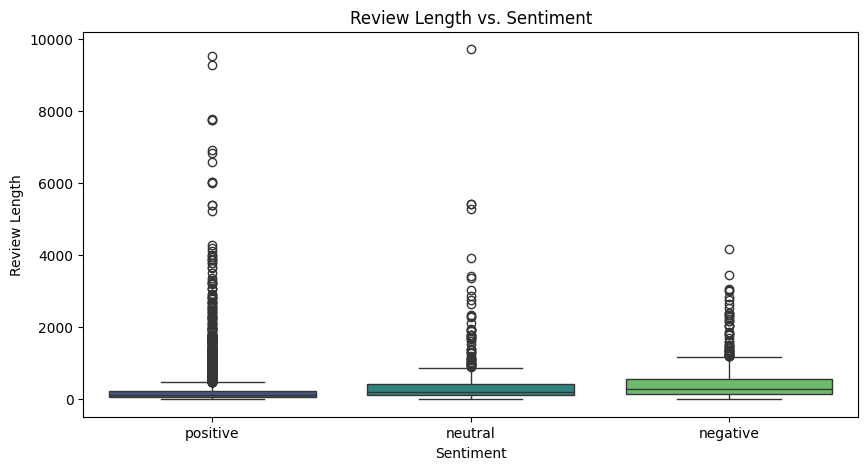

In [ ]:
# Plot the distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='review_length', data=data_cleaned, palette='viridis')
plt.title('Review Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

The boxplot shows the distribution of review lengths across different sentiments:

- Positive reviews tend to have a slightly higher median review length.

- Negative reviews have a wider range of review lengths, suggesting that users may provide more detailed feedback when they are dissatisfied.

Average Rating vs. Sentiment


<ipython-input-43-ff946b5113a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='average_rating', data=data_cleaned, palette='viridis')


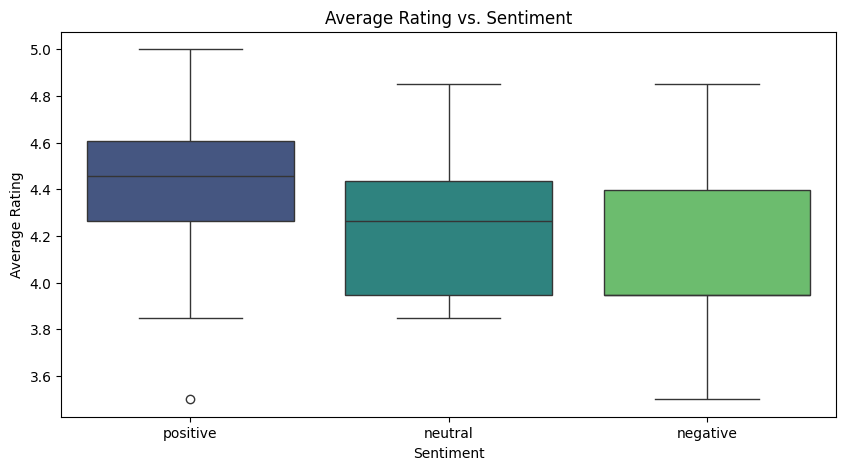

In [ ]:
# Plot the distribution of average rating by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='average_rating', data=data_cleaned, palette='viridis')
plt.title('Average Rating vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

Reviews Per Product

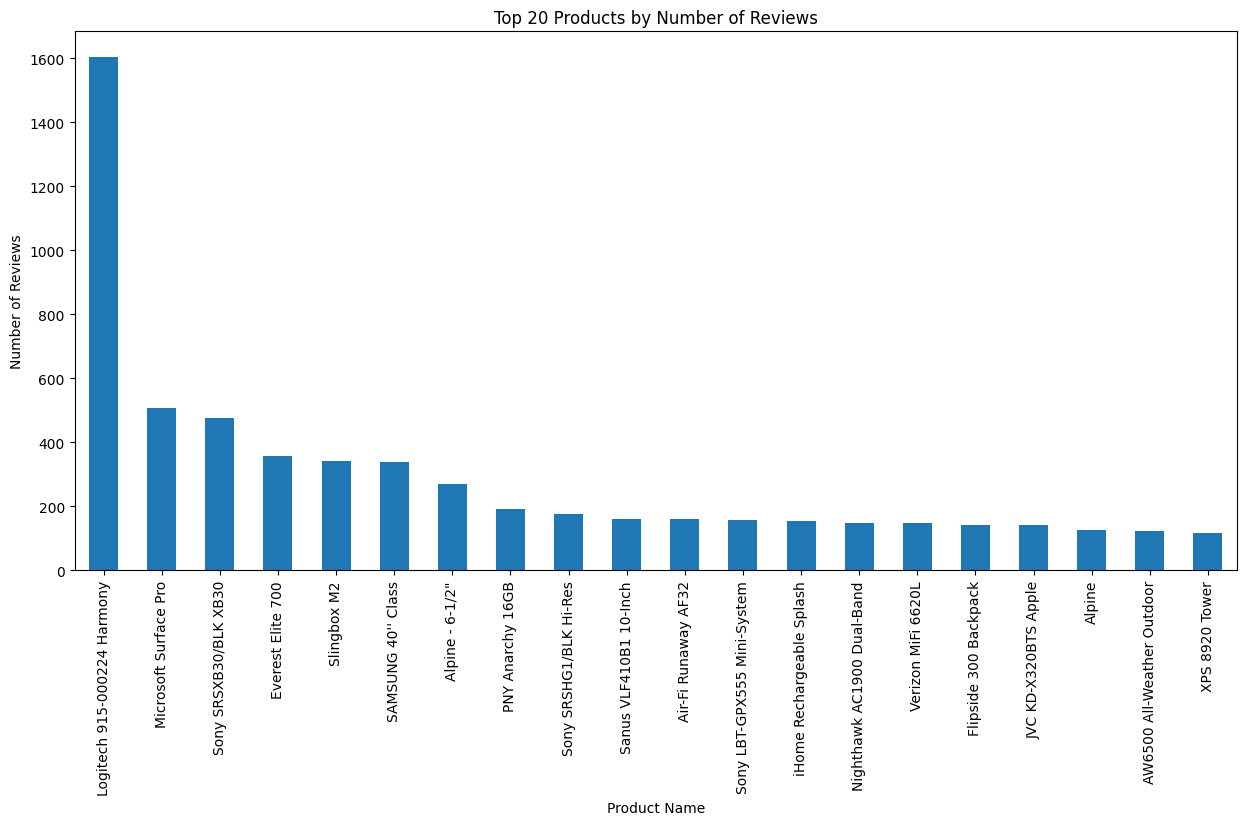

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/DatafinitiElectronicsProductData.csv')

# Function to shorten product names
def shorten_name(name):
    words = name.split()
    short_name = ' '.join(words[:3])
    return short_name

# Apply the function to create a new 'short_name' column
data['short_name'] = data['name'].apply(shorten_name)

# Plot the number of reviews per product with shortened names
plt.figure(figsize=(15, 7))
data['short_name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Products by Number of Reviews')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

Average Rating Per Product

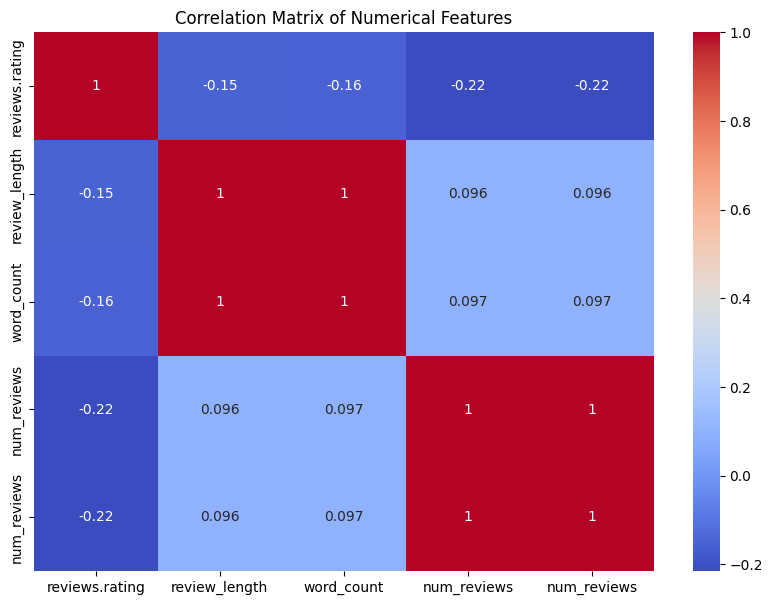

In [ ]:
# Calculate correlation matrix
correlation_matrix = data_cleaned[['reviews.rating', 'review_length', 'word_count', 'num_reviews']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
data_cleaned.to_csv('cleaned_data_with_features.csv', index=False)
